In [1]:
from lm_cell_embedder import lm_cell_reference_celltyping,lm_cell_embed , lm_cell_integrated_embed

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
adata_lungca = sc.read_mtx('lungca_tumor.mtx', dtype='float32')
genename = pd.read_csv('lungca_tumor_genes.csv', names=['num','genes'], header=0)
cellmeta = pd.read_csv('lungca_tumor_metafile.csv')
adata_lungca.obs = cellmeta
df_tmp = genename.iloc[:,1].to_frame()
df_tmp.index = df_tmp.genes
adata_lungca.var = df_tmp

In [4]:
adata_lungca.obs

Unnamed: 0           Barcode    Sample Sample_Origin  \
0      AAACCTGAGTTGCAGG_LUNG_T06  AAACCTGAGTTGCAGG  LUNG_T06         tLung   
1      AAAGCAAGTAATTGGA_LUNG_T06  AAAGCAAGTAATTGGA  LUNG_T06         tLung   
2      AAATGCCCATTACGAC_LUNG_T06  AAATGCCCATTACGAC  LUNG_T06         tLung   
3      AACGTTGTCTTGTCAT_LUNG_T06  AACGTTGTCTTGTCAT  LUNG_T06         tLung   
4      AACTCAGAGGCTCATT_LUNG_T06  AACTCAGAGGCTCATT  LUNG_T06         tLung   
...                          ...               ...       ...           ...   
45144  TTGGAACCATTTGCTT_LUNG_T34  TTGGAACCATTTGCTT  LUNG_T34         tLung   
45145  TTGTAGGCATCAGTAC_LUNG_T34  TTGTAGGCATCAGTAC  LUNG_T34         tLung   
45146  TTTACTGAGCTGTTCA_LUNG_T34  TTTACTGAGCTGTTCA  LUNG_T34         tLung   
45147  TTTACTGTCTACCAGA_LUNG_T34  TTTACTGTCTACCAGA  LUNG_T34         tLung   
45148  TTTGTCAGTCGCATCG_LUNG_T34  TTTGTCAGTCGCATCG  LUNG_T34         tLung   

              Cell_type Cell_type.refined Cell_subtype  
0         Myeloid cells     Myeloid cells       mo-Mac  
1         Myeloid cells     Myeloid cells       mo-Mac  
2         Myeloid cells     Myeloid cells       mo-Mac  
3         Myeloid cells     Myeloid cells       mo-Mac  
4         Myeloid cells     Myeloid cells       mo-Mac  
...                 ...               ...          ...  
45144  Epithelial cells  Epithelial cells          NaN  
45145  Epithelial cells  Epithelial cells          NaN  
45146     T lymphocytes               NaN          NaN  
45147     T lymphocytes               NaN          NaN  
45148     T lymphocytes               NaN          NaN  

[45149 rows x 7 columns]

### Load Xenium Data

In [5]:
adata_xe = sc.read_10x_h5(
    filename="./xenium_output/cell_feature_matrix/cell_feature_matrix.h5"
)

In [6]:
df = pd.read_csv(
    "./xenium_output/cells.csv.gz"
)
df.set_index(adata_xe.obs_names, inplace=True)
adata_xe.obs = df.copy()

In [7]:
adata_xe.obsm["spatial"] = adata_xe.obs[["x_centroid", "y_centroid"]].copy().to_numpy()


In [8]:
sc.pp.filter_cells(adata_xe, min_counts=10)
sc.pp.filter_genes(adata_xe, min_cells=5)


### Use Sentence Embedder

In [9]:
#If we want to use another 'intersect gene'
int_genes= [ii for ii in adata_lungca.var.index.tolist() if ii in adata_xe.var.index.tolist()]

In [12]:
#adata_emb.X -> sentence embedded results
adata_emb=  lm_cell_embed(adata_lungca, top_k=30, model_name="all-MiniLM-L6-v2",
                          gene_list=int_genes, obs_features= None,#['Sample'],
                         return_sentence=True)

/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/user/DATA1/Data/Xenium_lungcancer_10xdata/lm_cell_embedder.py:93: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_emb = sc.AnnData(emb_res)


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


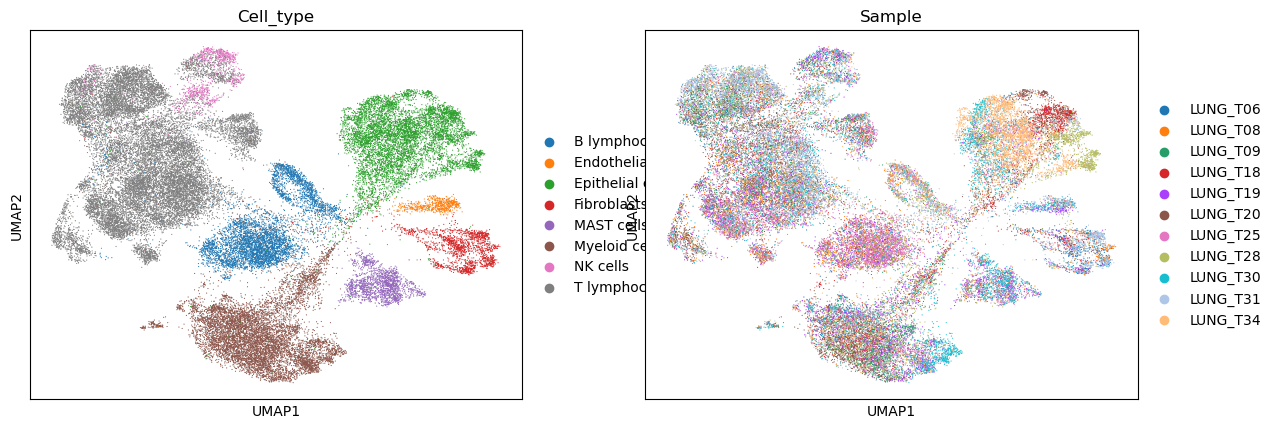

In [13]:
sc.pl.umap(adata_emb, color=['Cell_type','Sample'])

In [14]:
adata_emb.obs['cell_sentence'][0]

'Top genes are GPR183, C15orf48, CD93, C1orf162, FCGR3A, CD4, CD83, CD86, SNAI1, DST, MS4A6A, AIF1, IRF8, CD68, PTPRC, ADAM28, MS4A4A, MS4A2, MS4A1, MRC1, PECAM1, PGR, MTRNR2L11, PCSK2, PLAC9, MNDA, MMRN2, MMRN1, MLPH, and MLANA.'

### Integrated Embedded Results

In [15]:
adata_lungca_emb, adata_xe_emb = lm_cell_integrated_embed(adata_lungca, adata_xe, top_k=30, use_intersect= True)

/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/lm_cell_embedder.py:174: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_emb = sc.AnnData(emb_res)
/home/user/DATA1/Data/Xenium_lungcancer_10xdata/lm_cell_embedder.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_emb_new = sc.AnnData(emb_res_new)


In [16]:
adata_all = sc.concat([adata_lungca_emb, adata_xe_emb],  label="batch").copy()

/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [17]:
sc.tl.pca(adata_all, svd_solver='arpack')
sc.pp.neighbors(adata_all, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_all)

/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


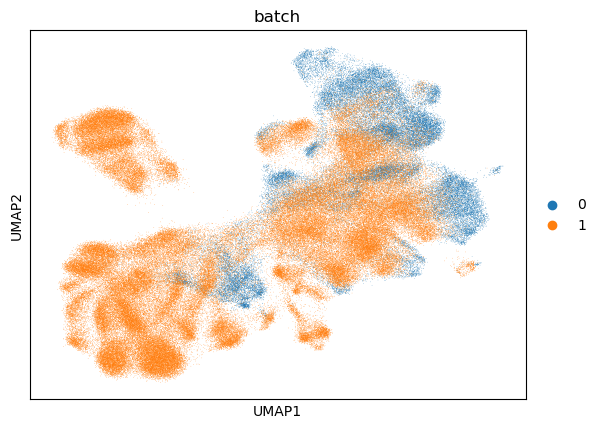

In [18]:
sc.pl.umap(adata_all, color=['batch'])

### Cell Annotation

In [19]:
adata_xe_ = lm_cell_reference_celltyping(adata_lungca, adata_xe, top_k=30, use_intersect= True, 
                                         ref_cell = 'Cell_type', new_name='CellType_LM')

/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Language Model Cell Embedding Is Implemented


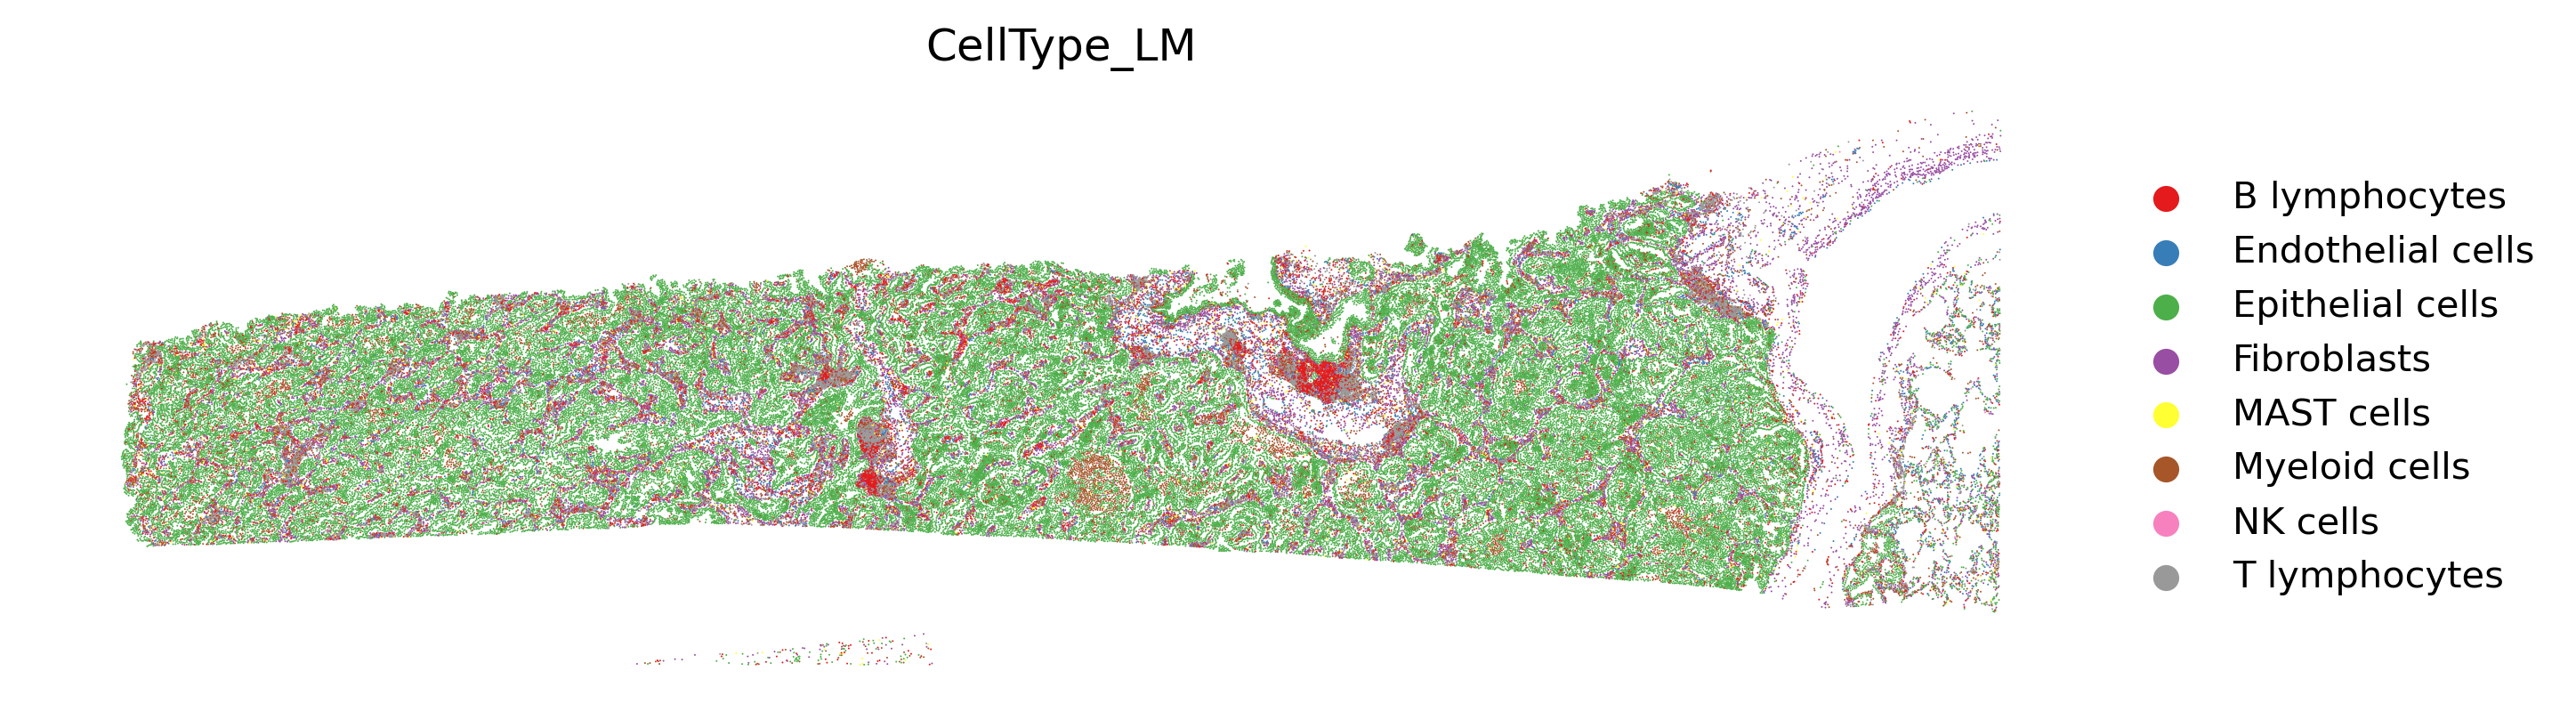

In [20]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
sc.pl.spatial(adata_xe_, color= ['CellType_LM'], img_key=None, spot_size=10,frameon=False,ax=ax,
             palette='Set1')

## Annotate with other methods

In [21]:
import tacco as tc


In [22]:
tc.tl.annotate(adata_xe, adata_lungca, 'Cell_type',result_key= 'Celltype',assume_valid_counts=True)


Starting preprocessing
Annotation profiles were not found in `reference.varm["Cell_type"]`. Constructing reference profiles with `tacco.preprocessing.construct_reference_profiles` and default arguments...
Finished preprocessing in 2.75 seconds.


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Starting annotation of data with shape (154472, 364) and a reference of shape (45147, 364) using the following wrapped method:
+- platform normalization: platform_iterations=0, gene_keys=Cell_type, normalize_to=adata
   +- multi center: multi_center=None multi_center_amplitudes=True
      +- bisection boost: bisections=4, bisection_divisor=3
         +- core: method=OT annotation_prior=None
mean,std( rescaling(gene) )  68.65673194731296 401.79924828921094
bisection run on 1


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


bisection run on 0.6666666666666667
bisection run on 0.4444444444444444
bisection run on 0.2962962962962963
bisection run on 0.19753086419753085
bisection run on 0.09876543209876543
Finished annotation in 6.04 seconds.


AnnData object with n_obs × n_vars = 154472 × 377
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    obsm: 'spatial', 'Celltype'
    varm: 'Celltype'

In [23]:
adata_xe.obs['Celltype_major'] = adata_xe.obsm['Celltype'].idxmax(axis = 1)


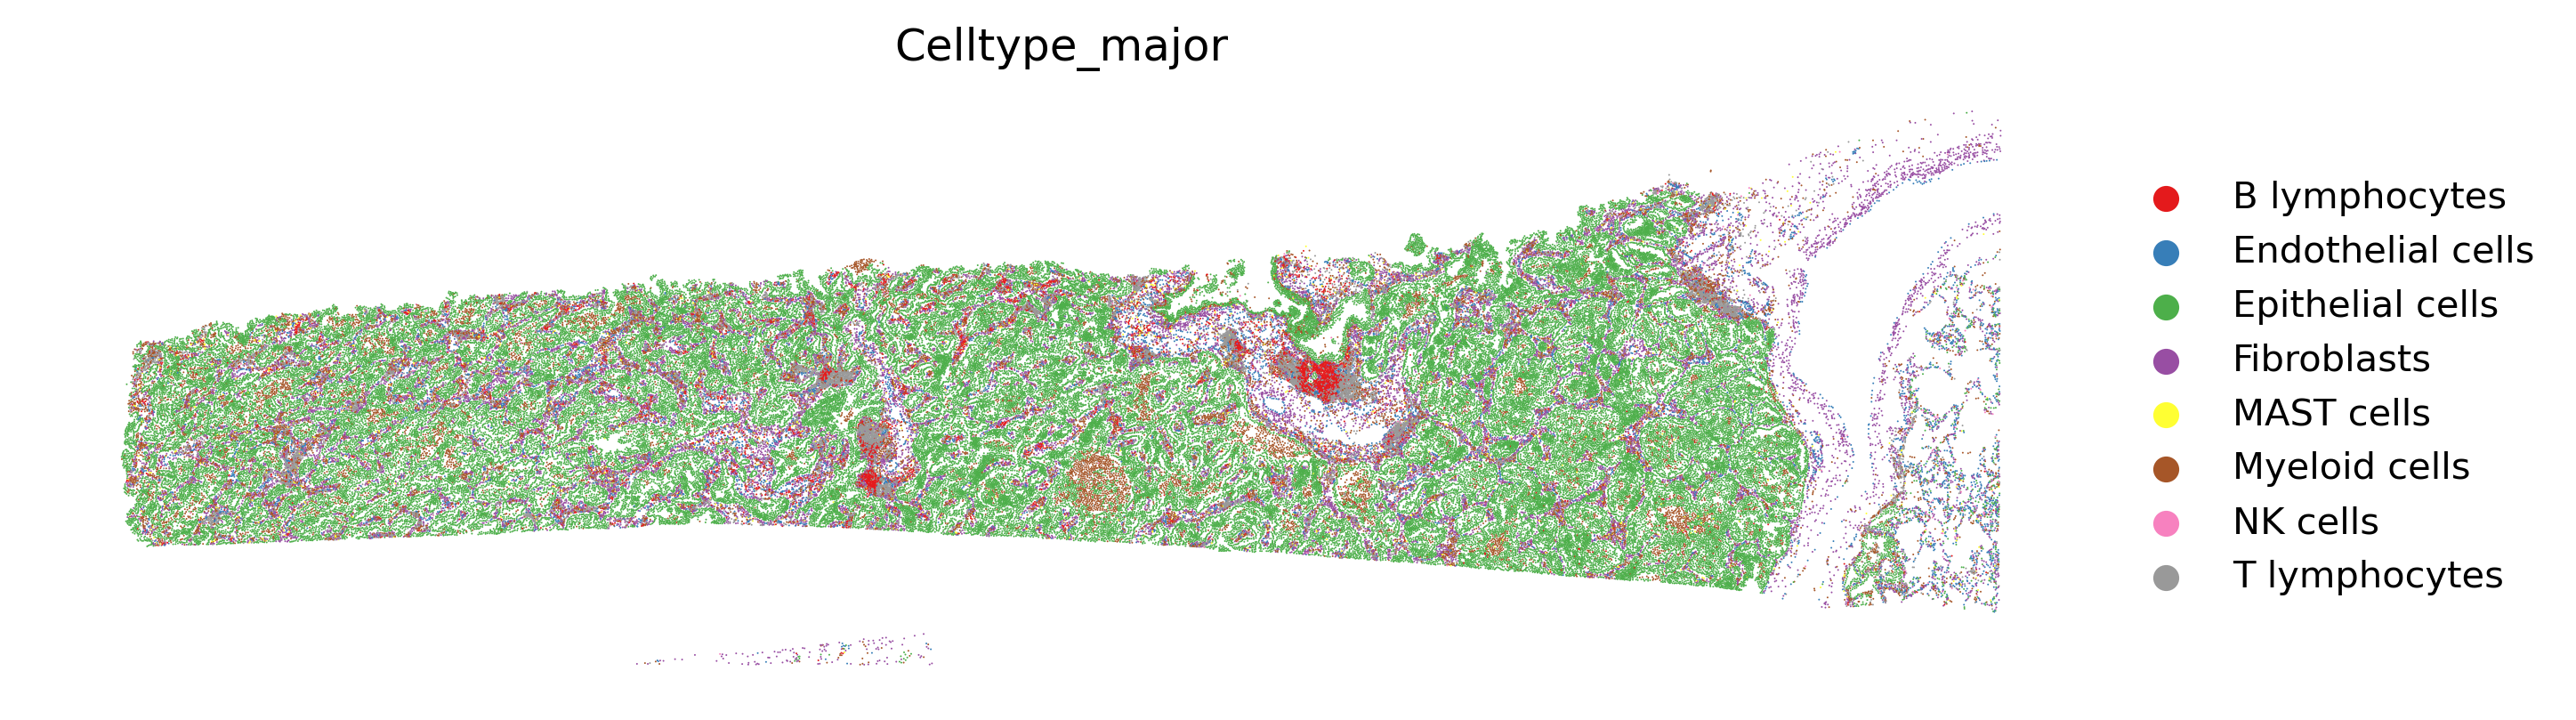

In [24]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
sc.pl.spatial(adata_xe, color= ['Celltype_major'], img_key=None, spot_size=10,frameon=False,ax=ax,
             palette='Set1')

<Axes: xlabel='Celltype_major', ylabel='CellType_LM'>

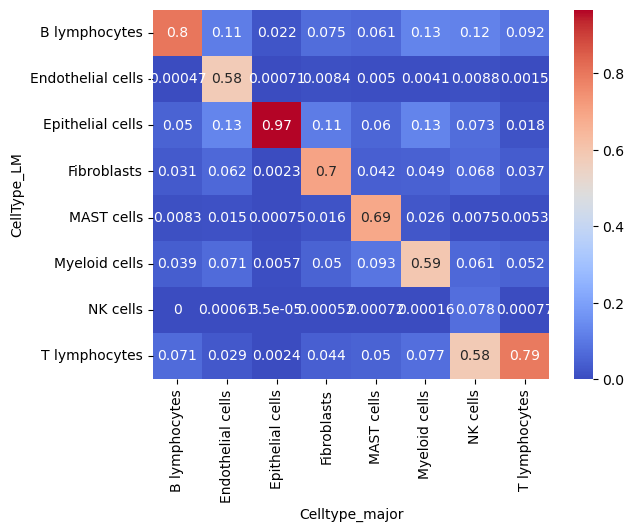

In [25]:
tmp_crosstab = pd.crosstab(adata_xe_.obs['CellType_LM'], adata_xe.obs['Celltype_major'],normalize='columns')
sns.heatmap(tmp_crosstab, cmap='coolwarm', annot=True)

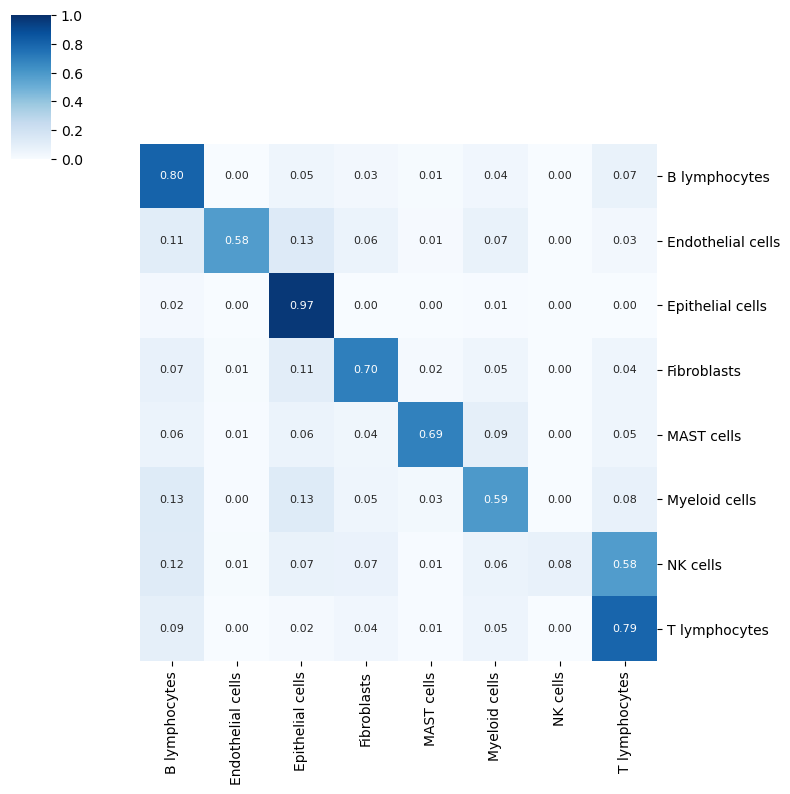

In [27]:
from sklearn.metrics import confusion_matrix

y_true =  adata_xe.obs['Celltype_major']
y_pred = adata_xe_.obs['CellType_LM']
cell_type_list = np.unique(y_true)
matrix = confusion_matrix(y_true, y_pred, labels=cell_type_list)
matrix = matrix.astype("float") / matrix.sum(axis=1)[:, np.newaxis]

df = pd.DataFrame(matrix, index=cell_type_list[:matrix.shape[0]], columns=cell_type_list[:matrix.shape[1]])
ax = sns.clustermap(df,  
                    cmap='Blues',
                    annot=True ,fmt=".2f", 
                    annot_kws={'size': 8}, 
                    vmin=0, 
                    vmax=1,
                    row_cluster=False, 
                    col_cluster=False, 
                    figsize=(8, 8))